# Deep Learning with Keras

This notebook shows how to build a deep learning model to predict credit quality for a number of student loans.

In [1]:
# Initial imports
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

%matplotlib inline

In [2]:
# Import student_loans.csv to Google Colab
from google.colab import files
uploaded = files.upload()

Saving student_loans.csv to student_loans (1).csv


In [3]:
# Read in data
data = "student_loans.csv"
df = pd.read_csv(data)
df.head()

,payment_history,location_parameter,stem_degree_score,gpa_ranking,alumni_success,study_major_code,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score,financial_aid_score,credit_ranking
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Create the features (X) and target (y) sets
X = df.iloc[:, 0:11].values
y = df["credit_ranking"].values

In [5]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

## Define a model with 1 hidden layer

In [6]:
# Define the model - shallow neural net
number_hidden_nodes = 8
number_input_features = 11

nn = Sequential()
# Hidden layer
nn.add(
    Dense(units=number_hidden_nodes, input_dim=number_input_features, activation="relu")
)
# Output layer
nn.add(Dense(units=1, activation="linear"))

In [7]:
# Compile the model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Train the model
model_1 = nn.fit(X, y, validation_split=0.3, epochs=200)

Epoch 1/200
35/35 [==============================] - 2s 17ms/step - loss: 36.3330 - mse: 36.3330 - val_loss: 34.1686 - val_mse: 34.1686
Epoch 2/200
35/35 [==============================] - 0s 7ms/step - loss: 33.5213 - mse: 33.5213 - val_loss: 30.7035 - val_mse: 30.7035
Epoch 3/200
35/35 [==============================] - 0s 6ms/step - loss: 30.9234 - mse: 30.9234 - val_loss: 27.2467 - val_mse: 27.2467
Epoch 4/200
35/35 [==============================] - 0s 7ms/step - loss: 28.4314 - mse: 28.4314 - val_loss: 23.9537 - val_mse: 23.9537
Epoch 5/200
35/35 [==============================] - 0s 6ms/step - loss: 25.9640 - mse: 25.9640 - val_loss: 20.9610 - val_mse: 20.9610
Epoch 6/200
35/35 [==============================] - 0s 11ms/step - loss: 23.5521 - mse: 23.5521 - val_loss: 18.1439 - val_mse: 18.1439
Epoch 7/200
35/35 [==============================] - 0s 8ms/step - loss: 21.1623 - mse: 21.1623 - val_loss: 15.6392 - val_mse: 15.6392
Epoch 8/200
35/35 [==============================] - 

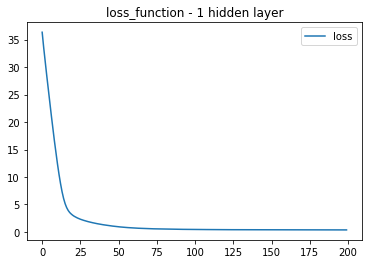

In [8]:
# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 1 hidden layer")
plt.legend(["loss"])
plt.show()

## Define a model with 2 hidden layers

In [9]:
# Define the model - deep neural net
number_input_features = 11
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 4

nn = Sequential()
# First hidden layer
nn.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))
# Output layer
nn.add(Dense(units=1, activation="linear"))

In [10]:
# Compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Fit the model
model_2 = nn.fit(X, y, validation_split=0.3, epochs=200)

Epoch 1/200
35/35 [==============================] - 1s 7ms/step - loss: 32.2832 - mse: 32.2832 - val_loss: 32.9536 - val_mse: 32.9536
Epoch 2/200
35/35 [==============================] - 0s 3ms/step - loss: 28.3513 - mse: 28.3513 - val_loss: 29.5153 - val_mse: 29.5153
Epoch 3/200
35/35 [==============================] - 0s 3ms/step - loss: 24.5092 - mse: 24.5092 - val_loss: 26.2383 - val_mse: 26.2383
Epoch 4/200
35/35 [==============================] - 0s 3ms/step - loss: 20.8350 - mse: 20.8350 - val_loss: 23.0613 - val_mse: 23.0613
Epoch 5/200
35/35 [==============================] - 0s 3ms/step - loss: 17.5920 - mse: 17.5920 - val_loss: 19.9529 - val_mse: 19.9529
Epoch 6/200
35/35 [==============================] - 0s 3ms/step - loss: 14.8503 - mse: 14.8503 - val_loss: 16.9927 - val_mse: 16.9927
Epoch 7/200
35/35 [==============================] - 0s 3ms/step - loss: 12.5813 - mse: 12.5813 - val_loss: 14.1037 - val_mse: 14.1037
Epoch 8/200
35/35 [==============================] - 0s

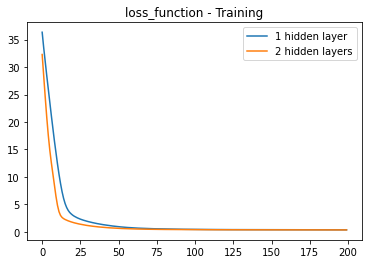

In [11]:
plt.plot(model_1.history["loss"])
plt.plot(model_2.history["loss"])
plt.title("loss_function - Training")
plt.legend(["1 hidden layer", "2 hidden layers"])
plt.show()

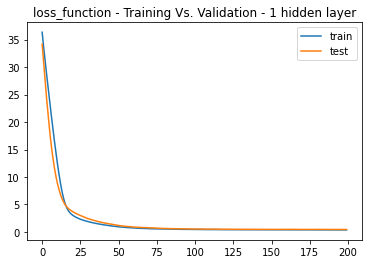

In [12]:
# Train vs test for shallow net
plt.plot(model_1.history["loss"])
plt.plot(model_1.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - 1 hidden layer")
plt.legend(["train", "test"])
plt.show()

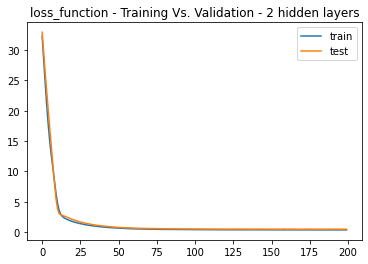

In [13]:
# Train vs test for deep net
plt.plot(model_2.history["loss"])
plt.plot(model_2.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - 2 hidden layers")
plt.legend(["train", "test"])
plt.show()